In [1]:
from math import pi
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def allpass1(freq, sr):
    omega = (2 * np.pi * freq / sr)
    EULER = np.exp(1)
#     alpha = (np.tan(pi * fc / sr) - 1) / (np.tan(pi * fc / sr) + 1)
    b0 = -pow(EULER, -omega)
    b1 = 1
    a0 = 1
    a1 = -pow(EULER, -omega)
    
    return [[b0,b1],[a0,a1]]

def allpass2(freq, sr, q):
    omega = (2 * np.pi * freq / sr)
    alpha = np.sin(omega) / (2 * q)
    
    a0 = (1 + alpha)
    a1 = (-2 * np.cos(omega))
    a2 = (1 - alpha) 
    b0 = (1 - alpha) 
    b1 = (-2 * np.cos(omega))
    b2 = (1 + alpha)
    
    return [[b0,b1,b2],[a0,a1,a2]]

In [3]:
apf1 = allpass1(12000, 48000)
apf2 = allpass2(12000, 48000, np.sqrt(0.5))

b = np.convolve(apf1[0], apf2[0])
a = np.convolve(apf1[1], apf2[1])

/var/folders/27/qgjvyhpn66730t4wymj3hkb80000gn/T/ipykernel_3243/3778704593.py:6: RuntimeWarning: divide by zero encountered in log10
  amplitude2 = 20 * np.log10(abs((h1-h2) * 0.5))


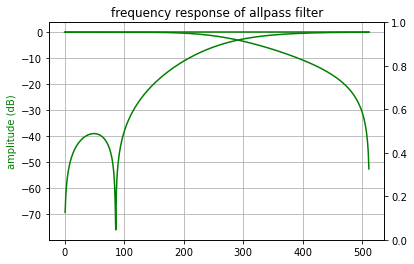

In [4]:
w1, h1 = signal.freqz(apf1[0], apf1[1])
w2, h2 = signal.freqz(apf2[0], apf2[1])

amplitude  = 20 * np.log10(abs((h1)))
amplitude1 = 20 * np.log10(abs((h1+h2) * 0.5))
amplitude2 = 20 * np.log10(abs((h1-h2) * 0.5))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of allpass filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(amplitude, 'g')
ax1.plot(amplitude1, 'g')
ax1.plot(amplitude2, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

plt.show()